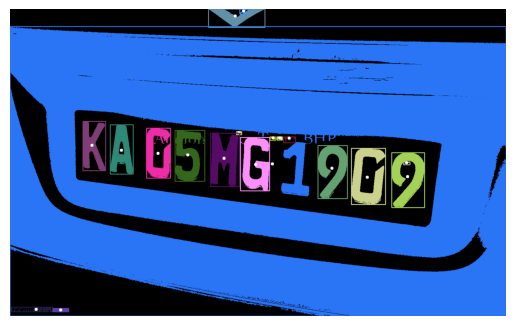

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread("numberplate.JPG", cv.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
_, binary = cv.threshold(image, 127, 255, cv.THRESH_BINARY_INV)

# Perform connected component analysis
num_labels, labels, stats, centroids = cv.connectedComponentsWithStats(binary, connectivity=8)

# Create an output image to visualize the labeled components
output_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

# Randomly color each connected component
for i in range(1, num_labels):  # Skip the background (label 0)
    x, y, w, h, area = stats[i]
    centroid_x, centroid_y = centroids[i]

    # Filter components based on area (e.g., remove noise)
    if area > 50:  # Adjust the threshold as needed
        # Assign a random color to the component
        color = np.random.randint(0, 255, size=(3,), dtype=int)
        output_image[labels == i] = color

        # Optionally, annotate the output image with bounding boxes and centroids
        cv.rectangle(output_image, (x, y), (x + w, y + h), color.tolist(), 2)
        cv.circle(output_image, (int(centroid_x), int(centroid_y)), 5, (255, 255, 255), -1)

plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()